# Lab 9: Training with GPUs

In this lab, we will learn how to leverage Graphical Processing Units (GPUs) to speed up the training of our models. The faster a model trains, the more experiments we can run, and therefore the better solutions we can find. Also, leveraging cloud GPUs has become so easy by now that it would be a pity not to take advantage of this opportunity. Only a few years ago, training a deep Neural Network using a GPU was a skill that demanded very sophisticated knowledge and much money. Nowadays, we train a model on many GPUs at a relatively affordable cost.

We will start this lab by introducing what a GPU is, where it can be found, what kinds of GPUs are available and why they are so useful to do Deep Learning. Then we will review several cloud providers of GPUs and guide you through how to use them. Once we have a working cloud instance with one or more GPUs, we will compare training a model with and without a GPU, and appreciate the speedup, especially with Convolutional Neural Networks. We will then extend training to multiple GPUs and introduce a few ways to use multiple GPUs in Keras.

This lab is a bit different from the other labs as there will be less Python code and more links to external documentation and services. Also, while we will do our best to have the most up to date guide to currently existing providers, it is important that you understand how fast the landscape is evolving. During the course of the past six months, each of the providers presented introduced newer and easier ways to access cloud GPUs, making the previous documentation obsolete. Thus, it is important that you understand the principles of why accelerated hardware helps and when. If you do this, it will be easy to adapt to new ways of doing things when they come out. All that said, let's get started!

## Graphical Processing Units

[Graphical Processing Units](https://en.wikipedia.org/wiki/Graphics_processing_unit) are computer chips that specialize in the parallel manipulation of huge, multi-dimensional arrays. Originally developed to accelerate the display of video games graphics, they are today widely used for other purposes like Machine Learning acceleration.

The term GPU became famous in 1999 when Nvidia - the dominant player in the field today - marketed the _GeForce 256_ as "the world's first GPU". In 2002, ATI Technologies, a competitor of Nvidia, coined the term "visual processing unit" or VPU with the release of the _Radeon 9700_. The following picture shows the original _GeForce 256_ (left side) and the _GeForce GTX 1080_ (right), one of the latest released and most powerful graphics cards in the market.

![NVIDIA Graphics cards](./assets/Nvidia_GPU.jpg)

In 2006, Nvidia came out with a high-level language called [CUDA](https://en.wikipedia.org/wiki/CUDA) (Compute Unified Device Architecture), that helps software developers and engineers to write programs from graphics processors in a high-level language – an approach termed GPGPU (General-Purpose computing on Graphics Processing Units). CUDA is a language that gives direct access to the GPU's virtual instruction set and parallel computational elements, for the execution of compute kernels. This was probably one of the most significant changes in the way researchers and developers interacted with GPUs.

Why are GPUs, initially developed for video games graphics, so useful for Deep Learning?

As you already know, training a Neural Network requires several operations, many of which involve large matrix multiplications. They perform matrix multiplications in the forward pass when inputs (or activations) and weights are multiplied (see [Lab 5](./05_Deep_Learning_Internals.ipynb) if you need a refresher on the math). Back-propagation also involves matrix multiplications, when the error is propagated back through the network to adjust the values of the weights. In practice, training a Neural Network mostly consists of matrix multiplications. Consider for example _VGG16_ (a frequently used convolutional Neural Network for image classification. Proposed by [K. Simonyan and A. Zisserman](https://arxiv.org/abs/1409.1556) ), it has approximately 140 million parameters. Using a CPU, it would take weeks to train this model and perform all the matrix multiplications.

GPUs allow to dramatically decrease the time needed for matrix multiplication, offering 10 to 100 times more computational power than traditional CPUs. There are several reasons why they make this computational speed-up possible, well discussed in [this article](https://themerkle.com/why-gpus-are-ideal-for-deep-learning/).

Summarizing the article, GPUs, comprised of thousands of cores unlike CPUs, not only allow for parallel operations, but they are ideal when it comes to fetching enormous amounts of memory. The best GPUs can fetch up to 750GB/s, which is huge if compared with the best CPU which can handle only up to 50GB/s memory bandwidth.
Of course, dedicated GPUs, designed explicitly for High-Performance Computing and Deep Learning, are more performant (and expensive) than gaming GPUs, but the latter, usually available in everyday laptops, is still a good starting option!

The following picture shows a comparison between CPU and GPU performance (source: [Nvidia](https://www.nvidia.com/en-us/ai-accelerated-analytics/)). The left image shows that the _Fermi GPU_ can process more than ten times the number of images processed (per second) by an _Intel 4 core CPU_. The right image shows that a _16 GPU Accelerated Servers_ can handle a more than six times bigger Neural Network if compared with a _1000 CPU Servers_.

![CPU versus GPU](./assets/CPUvsGPU.png)

## Cloud GPU providers

As of early 2018, all major cloud providers give access to cloud instances with GPUs. The two leaders in the space are [Amazon Web Services (AWS)](https://aws.amazon.com/) and [Google Cloud Platform (GCP)](https://cloud.google.com/gpu/). These two companies have been pioneers in providing cloud GPUs at affordable rates, and they keep adding new options to their offer. Besides, they both offer additional services specifically built to optimize and serve Deep Learning models at scale.

Other companies offering cloud GPUs are [Microsoft Azure Cloud](https://azure.microsoft.com/en-us/)and [IBM](https://www.ibm.com/cloud/gpu). Also, a few startups have started to offer Deep Learning optimized cloud instances, that are often cheaper and easier to access. In this lab we will review [Floydhub](https://www.floydhub.com/), [Pipeline.ai](https://community.cloud.pipeline.ai/admin/app/) and  [Paperspace](https://www.paperspace.com/).

Regardless of the cloud provider, if you have a Linux box with an NVIDIA GPU, it is not hard to equip it to run `tensorflow-gpu` and a Jupyter Notebook.

### Google Colab

The easiest way to give GPU acceleration a try is to use [Google Colab](https://research.google.com/colaboratory/faq.html), also known as _Colaboratory_. Besides being so easy, Colab is also free to use (you only need a Google account), which makes it perfect to try out GPU acceleration.

Colaboratory is a research tool for Machine Learning education and research. It’s a Jupyter Notebook environment that requires no setup to use: you can create and share Jupyter notebooks with others without having to download, install, or run anything on your computer other than a browser. It works with most major browsers, and it is most thoroughly tested with desktop versions of Chrome and Firefox.

This [welcome notebook](https://colab.research.google.com/notebooks/welcome.ipynb) provides the information to start working with Colab. In addition to all the standard operations in Jupyter you can change the notebook settings to enable GPU support:
![How to activate GPU in Colaboratory](./assets/colab_gpu_setting.png)

Once you've done that, you can run this code to verify that GPU is available:

```python
import tensorflow as tf
tf.test.gpu_device_name()
```

### Pipeline AI

The next best option to try a GPU for free in the cloud is the service offered by [PipelineAI](https://pipeline.ai/). PipelineAI service enables data scientists to train, test, optimize, deploy, and scale models in production rapidly and directly from a Jupyter Notebook or command-line interface. It provides a platform that simplifies the workflow and let the user focus only on the essential Machine Learning aspects.

The login process to use PipelineAI is quite simple and straightforward:
1. Sign up at [PipelineAI](https://community.cloud.pipeline.ai/admin/app/).
2. Once you are successfully logged in, you should see the following dashboard. You can either launch a new notebook or directly type commands in a terminal.
![](./assets/Pipeline1.png )<br/><br/>
3. Alternatively, you can use some of the already available resources, accessible from the left menu. For example, you can have a look at the `01a_Explore_GPU.ipynb` notebook, under `notebooks > 00_GPU_Workshop`
![](./assets/Pipeline2.png )<br/><br/>

PipelineAI is not only a platform providing GPU-powered Jupyter Notebooks, but it also allows you to do much more, such as monitoring the training of the algorithms, evaluating the results of your model, comparing the performances of different models, browsing among stored models, and so on. The following picture shows some of the available tools, but have a look at all the options available in the [community edition](https://community.cloud.pipeline.ai/admin/app/).  
![](./assets/Pipeline3.png )<br/><br/>

To better understand the potential of PipelineAI, we encourage you to take [this tour](https://pipeline.ai/tour/). Pipeline is under active development. You can follow its [Github repository](https://github.com/PipelineAI/pipeline)

### Floydhub

[Floydhub](https://www.floydhub.com/) is an other easy and cheap option to access GPU in the cloud.
Floydhub is a platform for training and deploying Deep Learning and AI applications. FloydHub comes with fully configured CPU and GPU environments ready to use for Deep Learning. It includes CUDA, cuDNN and popular frameworks like Tensorflow, PyTorch, and Keras. Please take a look at the [documentation](https://docs.floydhub.com/) for a more extended explanation of its features.

[This tutorial](https://docs.floydhub.com/getstarted/quick_start_jupyter/) explains how to start a Jupyter Notebook on Floydhub:
1. [Create an account](https://www.floydhub.com/login) on Floydhub.  
2. [Install `floyd-cli`](https://docs.floydhub.com/guides/basics/install/) on your computer.
```
pip install -U floyd-cli
```
3. [Create a project](https://www.floydhub.com/projects/create), named for example `my_jupyter_project`:
![](./assets/flod2.jpg)<br/><br/>

4. From your terminal, use `floyd-cli` to initialize the project (be sure to use the name you gave the project in step 3).
```
floyd init my_jupyter_project
```

>TIP: if this is the first time you run `floyd` it will ask you to log in. Just type `floyd login` and follow the instructions provided.

5. Use again `floyd-cli` to kick off your first Jupyter Notebook.
```
floyd run --gpu --mode Jupyter
```

This will confirm the job:

![](./assets/floyd_jupyter.png)

and open your FloydHub web page. Here you'll see a `View` button that will direct you to a Jupyter Notebook. The notebook is running on FloyHub's GPU servers.

![](./assets/floyd_web.png)

Once finished you can stop the Jupyter Notebook with the cancel button. Make sure to save your results by downloading the notebook before you terminate it:

![](./assets/floyd_terminate.png)

### Paperspace

[Paperspace](https://www.paperspace.com/) is a platform to access a virtual desktop in the cloud. In particular, the [Gradient](https://www.paperspace.com/gradient) service allows to explore, collaborate, share code and data using Jupyter Notebooks, and submit tasks to the Paperspace GPU cloud.

It is a suite of tools specifically designed to accelerate cloud AI and Machine Learning. Gradient also includes a powerful job runner (that can even run on the new Google TPUs!), first-class support for containers and Jupyter notebooks, and a new set of language integrations. Gradient also has a job runner, that allows you to work on your local machine and submit "jobs" to the cloud to process. Discover more about this service reading this [blog post](https://blog.paperspace.com/gradient/).

The procedure to run a Jupyter Notebooks within Paperspace is similar to what we have seen so far for different GPU services:

1. [Create an account](https://www.paperspace.com/account/signup) on Paperspace.
2. [Access the console](https://www.paperspace.com/console).
![](./assets/paperspace0.png)<br/><br/>
3. [Create a Jupyter Notebook](https://www.paperspace.com/console/notebooks) to create your models. (Credit card information on the billing page are required to enable all functionality.).

Paperspace is much more general than simply a hosted Jupyter Notebook service with GPU enabled. Since Paperspace gives you a full virtual desktop (both Linux and Windows, as shown in the [following picture](https://blog.paperspace.com/windows-10/)), you can install [any other applications](https://www.paperspace.com/ml) you need, from 3D rendering software to video editing and more.
![](./assets/Paperspace1.png)<br/><br/>

### AWS EC2 Deep Learning AMI

AWS provides a [Deep Learning AMI](https://aws.amazon.com/machine-learning/amis/) ready to use with all the NVIDIA drivers pre-installed as well as most Deep Learning frameworks and Python packages. It's not free, but it's sufficiently simple and versatile to use. We can quickly launch Amazon EC2 instances pre-installed with popular Deep Learning frameworks such as Apache MXNet and Gluon, TensorFlow, Microsoft Cognitive Toolkit, Caffe, Caffe2, Theano, Torch, PyTorch, Chainer, and Keras to train sophisticated, custom AI models, experiment with new algorithms, or to learn new skills and techniques.

To use any AWS service, we need to [open an account](https://portal.aws.amazon.com/billing/signup?nc2=h_ct). Several resources are available for a free trial period, as described in the [official web page](https://aws.amazon.com/free/). After finishing the trial period, keep in mind that the service will charge you. Also, keep in mind that GPU instances are not included in the free tier so you will incur in charges if you complete the next steps.

Follow this procedure to spin up a GPU enabled machine on AWS with the Deep Learning AMI:

1. [Access the AWS console](https://console.aws.amazon.com/console/home) and select _EC2_ from the _Compute_ menu.
![](./assets/aws1.PNG)<br/><br/>
2. Click on the _Launch Instance_ button.
![](./assets/aws2.PNG)<br/><br/>
3. Scroll the page and select an Amazon Machine Image (AMI). The _Deep Learning AMI_ is a good option to start. It comes in 2 flavors: Ubuntu and Amazon Linux. Both are good, and we recommend you use the flavor you are more comfortable with. Also, note that there are both a _Deep Learning AMI_ and a _Deep Learning AMI Basic_. The _Basic_ AMI has only GPU drivers installed but no Deep Learning software. The full AMI comes pre-packaged with a ton of useful packages including [Tensorflow](https://www.tensorflow.org/), [Keras](https://keras.io/), [Pytorch](https://pytorch.org/), [MXNet](https://mxnet.incubator.apache.org/), [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/) and more. We recommend you use this one to start.
![](./assets/aws3.PNG)<br/><br/>
4. Chose an instance type from the menu. Roughly speaking, instance types are ordered in ascending order considering the computational power and the storage space.
![](./assets/aws4.PNG)<br/><br/>
Here's a summary table of AWS GPU instances. Read the [documentation](https://aws.amazon.com/ec2/instance-types/) for a detailed description of every instance type.
![](./assets/aws_gpus.PNG)<br/><br/>


Once you have chosen the instance go through the other steps:

- Step 3: Configure Instance Details
- Step 4: Add Storage
- Step 5: Add Tags
- Step 6: Configure Security Group: make sure to leave port 22 open for SSH
- Step 7: Review Instance Launch

and finally, launch your instance with a key pair you own. Let's assume it's called `your-key.pem`.

You should now be able to see the newly created instance in the dashboard, and you are now ready to connect with it.
![](./assets/aws5.png)<br/><br/>

Finally, take a look at the [Tutorials and Examples](https://docs.aws.amazon.com/dlami/latest/devguide/tutorials.html) section to understand better how to use Deep Learning AMI service offered by AWS.

#### Connect to AMI (Linux)

Once your Instance state is `running` you are ready to connect to it. We are going to do that from a terminal. We will use the ssh key we have generated, and we will also route remote port 8888 to the local port 8888 so that we get to access Jupyter Notebook. Go ahead and type:

```
ssh -i your-key.pem -L 8888:localhost:8888 ubuntu@<your-ip>
```

> TIP: if you get a message that says your key is not protected, you need to change the permissions of your key to read-only. You can do that by executing the command: `chmod 600 your-key.pem`.

Once you're connected you should see a screen like the following, where all the environments are listed:
![](./assets/aws_dl_instance.png)

We will go ahead and activate the `tensorflow_py36` environment with the command:

```
source activate tensorflow_p36
```

and launch Jupyter Notebook with:

```
nohup jupyter notebook --no-browser &
```

This command launches Jupyter in a way that will not stop if you disconnect from the instance. The final step is to retrieve the Jupyter address: `http://localhost:8888/?token=<your-token>`. You will find it in the `nohup.out` file:
```
tail nohup.out
```
Copy it and paste it into your browser. If you've done everything correctly you should see a screen like this one:
![](./assets/jupyter_aws.png)

> TIP: Aws also has a tutorial here: https://docs.aws.amazon.com/dlami/latest/devguide/tutorials.html

#### Connect to AMI (Windows)

To connect with the AWS EC2 Deep Learning AMI from _Windows_ similar steps must be followed, but in this case it is convenient to use [PuTTY](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html), an SSH client specifically developed for the Windows platform.
After the installation of Putty in your machine, the procedure to connect with the cloud instance is as follows:

1. In the _Session_ palette:
    - Host Name (or IP address): `ubuntu@<your-ip>`
    - Port: `22`
    - Connection type: `SSH`
2. In the _Connection > SSH > Auth_ palette:
    - Private key file for autentication: browse the key generated by [PuttyGen](https://www.ssh.com/ssh/putty/windows/puttygen)
3. In the _Conenction > SSH > Tunnels_ palette:
    - Source port: `8888`
    - Destination: `localhost:8888`

![](./assets/putty0.png)<br/><br/>

Once you are connected, follow the same steps as for the Linux case.

#### Turning off the instance

Once done with your experiments, remember to turn off the instance to avoid useless costs. Just go to your AWS console and either _Stop_ or _Terminate_ the instance, by choosing an action from the `Actions` menu:

![](./assets/stop.png)

#### AWS Command Line Interface

AWS also supports a command line interface [AWS CLI](https://aws.amazon.com/cli/) that allows performing the same operations from the terminal. If you'd like to try it you can install it using the command:

```
pip install awscli
```

from your terminal. Once you have installed it, you need to add configuration credentials. First, you'll have to set up an IAM user in the EC2 dashboard, then run the following configuration command:

```
aws configure
```
That will prompt you to insert some information:

```
AWS Access Key ID [None]: <your access key>
AWS Secret Access Key [None]: <your secret>
Default region name [None]: us-east-1
Default output format [None]: ENTER
```

[Aws regions and availability zones](https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/Concepts.RegionsAndAvailabilityZones.html) are:

![](./assets/awsregions.png)

Make sure to choose a region that provides a copy of the Deep Learning AMI.

As explained in the [AWS CLI guide](https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-configure.html), the output format can be `json`:

![](./assets/aws_json.png)

or text:
![](./assets/aws_text.png)

Once configured you can start your Deep Learning instance with the following command:

```
aws ec2 run-instances \
  --image-id <DL-AMI-ID-for-your-region> \
  --count 1 \
  --instance-type <instance-type> \
  --key-name <your-ssh-key-name> \
  --subnet-id <subnet-id> \
  --security-group-ids <security-group-id> \
  --tag-specifications 'ResourceType=instance,
                        Tags=[{Key=Name,Value=<a-name-tag>}]'
```

Where you will need to insert the following parameters:

- `<DL-AMI-ID-for-your-region>`: the AMI ID for the Deep Learning AMI in the AWS region you've chosen
- `<instance-type>`: the type of instance, like `g2.2xlarge`, `p3.16xlarge` etc.
- `<your-ssh-key-name>`: then give a name to your ssh key. You must have this on your disk.
- `<subnet-id>`: the subnet id, you can find this when you launch an instance from the web interface.
- `<security-group-id>`: the security group id, you can find this when you launch an instance from the web interface as well.
- `<a-name-tag>`: a name for your instance, so that you can easily retrieve it by name

You can query the status of your launch with the command:

```
aws ec2 describe-instances
```
and remember to stop or terminate the instance when you are done, for example using this command:

```
aws ec2 terminate-instances --instance-ids <your-instance-id>
```
which would return something like this:

![](./assets/terminate_instance.png)


### AWS Sagemaker

[AWS Sagemaker](https://aws.amazon.com/sagemaker/) is an AWS managed solution that allows performing all the steps involved in a Deep Learning pipeline. In fact, on Sagemaker you can define, train and deploy a Machine Learning model in just a few steps.

Sagemaker provides an integrated Jupyter Notebook instance that can be used to access data stored in other AWS services, explore it, clean it and analyze it as well as to define a Machine Learning model. It also provides common Machine Learning algorithms that are optimized to run efficiently against extensive data in a distributed environment.

Detailed information about this service is in the official [documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/whatis.html).

The procedure to spin up a notebook is similar to what previously seen:

1. [Create an AWS account](https://aws.amazon.com/console/?nc1=h_ls) and access the console.
2. From the AWS console, select the _Amazon SageMaker_ service, under the Machine Learning group.
![](./assets/sage0.PNG)<br/><br/>
3. Click the button _Create notebook instance_.
![](./assets/sage1.PNG)<br/><br/>
4. Assign a _Notebook instance name_, for example, "my_first_notebook" and click the button _Create notebook instance_. Sagemaker offers several types of instances, including a cheap option for development of your notebook, a CPU-heavy instance if your code requires a lot of CPUs and a GPU-enabled instance if you need it. Notice that the instance types available for the notebook instance are different from the ones available for model training and deployment.
![](./assets/sage2.PNG)<br/><br/>
5. Start working on the newly created notebook
![](./assets/sage3.png)<br/><br/>

Once done developing your model, Sagemaker allows to export, train and deploy the model with straightforward steps. Please refer to the [User guide](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-training.html) for more information on these steps.

### Google Cloud and Microsoft Azure

Although we reviewed in detail the solutions offered by Amazon AWS, both Google Cloud and Microsoft Azure offer similarly priced GPU-enabled cloud instances. We invite you to check their offering here:
- [Google Cloud]()
- [Microsoft Azure]()

### The DIY solution (on Ubuntu)

If you'd like start from scratch on a barebone Linux machine with a GPU, here are the steps you will need to follow:

1. Install [NVIDIA Cuda Drivers](https://developer.nvidia.com/cuda-downloads). CUDA is a language that gives direct access to the GPU's virtual instruction set and parallel computational elements, for the execution of compute kernels.
- Download and install [CuDNN](https://docs.nvidia.com/deeplearning/sdk/cudnn-install/index.html). CuDNN is an NVIDIA library built on CUDA that implements a lot of common Neural Network algorithms.
- Install [Miniconda](https://conda.io/en/latest/miniconda.html). Miniconda is a minimal installation of Python and the `conda` package manager that we will use to install other packages.
- Install a few standard packages  `conda install pip numpy pandas scikit-learn scipy matplotlib seaborn h5py`. This command will install the packages in the `base` environment.
- Install Tensorflow compiled with GPU support: `pip install tensorflow-gpu`.
- (Optional) Install Keras: `pip install keras`.

## GPU VS CPU training

Regardless of how you decided to get access to a GPU-enabled cloud instance, in the following code, we will assume that you have access to such an instance and review some functionality that is available in Tensorflow when running on a GPU instance.

Let's start by comparing training speed on a CPU vs. a GPU for a Convolutional Neural Network. We will train this on the CIFAR10 data that we have also encountered in [Lab 6](6_Convolutional_Neural_Networks.ipynb). Let's load the usual packages of Numpy, Pandas, and Matplotlib:

In [1]:
with open('common.py') as fin:
    exec(fin.read())

In [2]:
with open('matplotlibconf.py') as fin:
    exec(fin.read())

Let's also import Tensorflow:

In [3]:
import tensorflow as tf

### Tensorflow 2.0 compatibility

Tensorflow 2.0 enables [Eager Execution](https://www.tensorflow.org/guide/eager) by default. From our tests this seems to have a problem with the allocation on GPU vs CPU. The issue is documented [here](https://github.com/tensorflow/tensorflow/issues/26244). While the developers at Tensorflow figure out the problem and find a fix, we will disable eager execution:

In [4]:
tf.compat.v1.disable_eager_execution()

### Convolutional model comparison

First, we load the data using a helper function that also rescales it and expands the labels to binary categories. If you're unfamiliar with these steps, we recommend you review [Lab 3](3_Machine_Learning.ipynb), [Lab 4](4_Deep_Learning.ipynb) and [Lab 6](6_Convolutional_Neural_Networks.ipynb) where they are repeated multiple times and explained in detail.

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [6]:
def cifar_train_data():
    print("Loading CIFAR10 Data")
    (X_train, y_train), _ = cifar10.load_data()
    X_train = X_train.astype('float32') / 255.0
    y_train_cat = to_categorical(y_train, 10)
    return X_train, y_train_cat

X_conv, y_conv = cifar_train_data()

Loading CIFAR10 Data


Next, we define a function that creates the convolutional model. By now you should be familiar with every line of code that follows, but just as a reminder, we create a `Sequential` model adding layers in sequence, like pancakes in a stack. The layers in this network are:

- **2D Convolutional layer** with 32 filters, each of size 3x3 and ReLU activation. Notice that in the first layer we also specify the input shape of `(32, 32, 3)` which means our images are 32x32 pixels with three colors: RGB.
- **2D Convolutional layer** with 32 filters, each of size 3x3 and ReLU activation. We add a second convolutional layer immediately after the first to effectively convolve over larger regions in the input image.
- **Max Pooling layer** 2 D with a pool size of 2x2. This will cut in half the height and the width of our feature maps, effectively making the calculations four times faster.
- **Flatten layer** to go from the order four tensors used by convolutional layers to an order-2 tensor suitable for fully connected networks.
- **Fully connected layer** with 512 nodes and a ReLU activation
- **Output layer** with ten nodes and a Softmax activation

If you need to review these concepts, make sure to check out [Lab 6](6_Convolutional_Neural_Networks.ipynb) for more details.

We also compile the model for a classification problem using the **Categorical Cross-entropy** loss function and the **RMSProp** optimizer. These are explained in detail in [Lab 5](5_Deep_Learning_Internals.ipynb).

Notice also that we import the `time` module to track the performance of our model:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from time import time

In [8]:
def convolutional_model():
    print("Defining convolutional model")
    t0 = time()
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
                     padding='same',
                     input_shape=(32, 32, 3),
                     kernel_initializer='normal',
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu',
                     kernel_initializer='normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    print("{:0.3f} seconds.".format(time() - t0))


    print("Compiling the model...")
    t0 = time()
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    print("{:0.3f} seconds.".format(time() - t0))
    return model

Now we are ready to do a comparison between the CPU training time and the GPU training time. We can force tensorflow to create the model on the the CPU with the context setter `with tf.device('cpu:0')`. Let's create a model on the CPU:

In [9]:
with tf.device('cpu:0'):
    model = convolutional_model()

Defining convolutional model
0.089 seconds.
Compiling the model...
0.111 seconds.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 3,702,186
Trainable params: 3,702,186
Non-trainable params: 0
______________________________________________

Now let's train the CPU model for 2 epochs:

In [11]:
print("Training convolutional CPU model...")
t0 = time()
model.fit(X_conv, y_conv,
          batch_size=1024,
          epochs=2,
          shuffle=True)
print("{:0} seconds.".format(time() - t0))

Training convolutional CPU model...
Epoch 1/2
50000/50000 [==============================] - 99s 2ms/sample - loss: 2.0398 - accuracy: 0.2827
Epoch 2/2
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.6681 - accuracy: 0.4196
203.2117199897766 seconds.


Now let's compare the model with a model living on the GPU. We use a similar context setter: `with tf.device('gpu:0')`:

In [12]:
with tf.device('gpu:0'):
    model = convolutional_model()

Defining convolutional model
0.087 seconds.
Compiling the model...
0.181 seconds.


And then we train the model on the GPU:

In [13]:
print("Training convolutional GPU model...")
t0 = time()
model.fit(X_conv, y_conv,
          batch_size=1024,
          epochs=2,
          shuffle=True)
print("{:0.3f} seconds.".format(time() - t0))

Training convolutional GPU model...
Epoch 1/2
50000/50000 [==============================] - 4s 75us/sample - loss: 2.0665 - accuracy: 0.2737
Epoch 2/2
50000/50000 [==============================] - 3s 67us/sample - loss: 1.6770 - accuracy: 0.4141
7.567 seconds.


As you can see training on the GPU is much faster than on the CPU. Also notice that the second epoch runs much faster than the first one. The first epoch also includes the time to transfer the model to the GPU, while for the following ones the model has already been transferred to the GPU. Pretty cool!

#### NVIDIA-SMI

We can check that the GPU is actually being utilized using `nvidia-smi`. The [NVIDIA System Management Interface](https://developer.nvidia.com/nvidia-system-management-interface) is a tool that allows us to check the operation of our GPUs. To better understand how it works, have a look at the [documentation](http://developer.download.nvidia.com/compute/DCGM/docs/nvidia-smi-367.38.pdf).

To use the NVIDIA System Management Interface:
1. Open a new terminal from the Jupyter interface
![](./assets/terminal0.PNG)
2. Type `nvidia-smi` in the command line.

## Multiple GPUs

If your machine has more than one GPU, you can use multiple GPUs to improve your training even more. There are several ways to distribute the training over several GPUs, and the tools to do this are improving and changing very rapidly.

We will focus here on the general ideas and suggest a couple of ways to perform parallelization of a model.

### Distribution strategies

There are many ways to distribute the training across multiple GPUs and even across several machines with many GPUs. Tensorflow has iterated a lot on the API to do this, and the stable version at the time of publication (TF 1.13) offers several distribution strategies through [the `tf.contrib` module](https://www.tensorflow.org/api_docs/python/tf/contrib/distribute). All of these will eventually be ported to TF 2.0, which is the version we are using in this labs.

Let's start from the basics.

One way to distribute the training across multiple GPUs replicate the same model on each GPU and give each GPU a different batch of data. This is called **data parallelization** or **mirrored strategy**. Using this strategy allows increasing the batch size to N times the original batch size, where N is the number of GPUs available. At each weight update, each GPU receives a different batch of data, runs the forward pass and the back-propagation and then communicates the weigh updates to the CPU, where all the updates are averaged and distributed back to each model on each GPU.

With this strategy, the batch size is not limited by the GPU memory. The more GPUs we add, the larger a batch size we can use. Many cloud providers offer instances equipped with eight or even sixteen GPUs, and research groups worldwide published results using hundreds and even thousands of GPUs.

The only limitation of this strategy is that the whole model must fit in the GPU memory, so even though the batch size is not capped, the model size is capped.

The other way to distribute training across multiple GPUs is to split the model across multiple GPUs, which goes by the name of also called **model parallelization** or **model distribution**. Why would one use this strategy at all? It turns out that many state-of-the-art results, especially those concerning language modeling and natural language understanding, require enormous models, that exceed the capacity of a single GPU. Currently, only researchers and large companies like Google or Amazon use this strategy, but in the future, it will become more accessible and more common also for other users.

In the rest of this lab, we will focus on data parallelization.

We will introduce it with the most recent API offered by Tensorflow 2.0, but we will also mention a couple of other ways to achieve multi GPU parallelization.

### Data Parallelization using Tensorflow

Tensorflow makes it easy to parallelize training by distributing data across multiple GPUs through the `tf.distribute` module. At the time of publishing, although many strategies are available in TF 1.13, TF 2.0 only implements the data parallelization strategy, which we will review here.

First, we need to create an instance of the `MirroredStrategy` distribution strategy:

In [14]:
strategy = tf.distribute.MirroredStrategy()

Next we take our model and replicate it across multiple GPUs using the context setter `with`:

In [15]:
with strategy.scope():
    model = convolutional_model()

Defining convolutional model
0.174 seconds.
Compiling the model...
0.169 seconds.


At this point we can train the model normally, but with a larger batch. We define a flag with the number of GPUs (2 in our case):

In [16]:
# adjust this to the number of gpus in your machine
NGPU = 2

And then we train the model:

In [17]:
print("Training recurrent GPU model on {} GPUs ...".format(NGPU))
t0 = time()
model.fit(X_conv, y_conv,
          batch_size=1024*NGPU,
          epochs=2,
          shuffle=True)
print("{:0.3f} seconds.".format(time() - t0))

Training recurrent GPU model on 2 GPUs ...
Epoch 1/2
25/25 [==============================] - 4s 154ms/step - loss: 2.1736 - accuracy: 0.2295
Epoch 2/2
25/25 [==============================] - 2s 67ms/step - loss: 1.8342 - accuracy: 0.3600
13.702 seconds.


The API for `tf.distribute` is still in progress and we invite you to check it out periodically to learn about new strategies that get added.

### Data Parallelization using Keras

Keras also has an independent way to parallelize training by distributing data across multiple GPUs. This is achieved through the `multi_gpu_model` command. Let's import it from `keras.utils`:

In [18]:
from tensorflow.keras.utils import multi_gpu_model

> TIP: if you're on floydhub the keras version is probably earlier than the one we are using in the labs. If you don't find `keras.utils.multi_gpu_model` try with
```python
from tensorflow.keras.utils.training_utils import multi_gpu_model
```
or update keras with `pip install --upgrade keras`

Now let's create a new convolutional model (on the cpu):

In [19]:
with tf.device("/cpu:0"):
    model = convolutional_model()

Defining convolutional model
0.088 seconds.
Compiling the model...
0.112 seconds.


and let's distribute it over 2 GPUs (this will only work if you have at least 2 GPUs on your machine):

In [20]:
model = multi_gpu_model(model, NGPU, cpu_relocation=True)

> TIP: you may need to change the `cpu_relocation` parameter to False if your machine has NV-link. Check the [Tensorflow documentation](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/utils/multi_gpu_model) for more information.

Once the model has been parallelized, we need to re-compile it:

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Finally we can train the model in the exact same way as we did before. Notice that the `multi_gpu_model` documentation explains how a batch is divided to the GPUs:

    E.g. if your `batch_size` is 64 and you use `gpus=2`,
    then we will divide the input into 2 sub-batches of 32 samples,
    process each sub-batch on one GPU, then return the full
    batch of 64 processed samples.

This also means that if we want to maximize GPU utilization we want to increase the batch size by a factor equal to the number of GPUs, so we will use `batch_size=1024*NGPU`.

In [22]:
print("Training recurrent GPU model on 2 GPUs ...")
t0 = time()
model.fit(X_conv, y_conv,
          batch_size=1024*NGPU,
          epochs=2,
          shuffle=True)
print("{:0.3f} seconds.".format(time() - t0))

Training recurrent GPU model on 2 GPUs ...
Epoch 1/2
50000/50000 [==============================] - 4s 83us/sample - loss: 2.1872 - accuracy: 0.2267
Epoch 2/2
50000/50000 [==============================] - 4s 72us/sample - loss: 1.8637 - accuracy: 0.3500
8.523 seconds.


Since with 2 GPUs, each epoch takes only a few seconds, let's run the training for a few more epochs:

In [23]:
h = model.fit(X_conv, y_conv,
              batch_size=1024*NGPU,
              epochs=30,
              shuffle=True,
              verbose=0)

and let's plot the history like we've done many times in this labs:

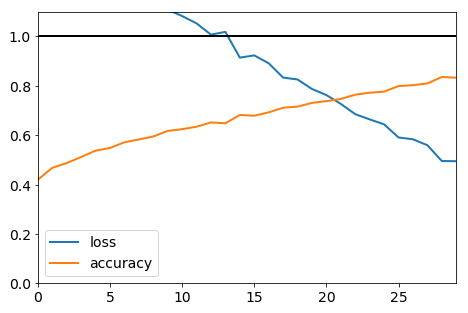

In [24]:
pd.DataFrame(h.history).plot()
plt.ylim(0, 1.1)
plt.axhline(1, color='black');

As you can see, with 30 epochs the model seems to be still improving. Having multiple GPUs allowed us to iterate fast and explore the performance of a powerful convolutional model more rapidly. Cool!

### Data Parallelization using Horovod

[Horovod](https://eng.uber.com/horovod/) is an open source framework maintained by Uber that allows easy parallelization of Deep Learning model written in Tensorflow, Keras, PyTorch, and MXNet. Horovod stems from the realization that the High-performance Computing community has been running programs on supercomputers with thousands of CPUs and GPUs for decades now.

Instead of designing and implementing an independent parallelization library as Tensorflow did, Horovod took the approach to leverage the existing best practices from the HPC community and use their results to distribute Deep Learning models on multiple devices. In particular, Horovod uses an open implementation of the [Message Passing Interface standard](https://en.wikipedia.org/wiki/Message_Passing_Interface) called [Open MPI](https://www.open-mpi.org/).

Horovod is currently not compatible with TF 2.0, so we will refer the interested reader to an [example using Keras and TF 1.13](https://github.com/horovod/horovod/blob/master/examples/keras_mnist.py). There's an [open issue](https://github.com/horovod/horovod/issues/907) tracking this and Horovod's developers are working on it, so stay tuned.

### Supercomputing with Tensorflow Mesh

Finally, we'd like to mention a new component in the Tensorflow ecosystem called [MESH](https://github.com/tensorflow/mesh). Mesh TensorFlow is aimed ad super computers with many CPUs and GPUs and is not really for the everyday user yet, still it is a very cool project that allows to train incredibly large networks on an arbitrary computing architecture.

## Conclusion

In this lab we have seen how GPUs can easily be used to train faster on larger data. Before you move on to the next lab make sure to terminate all instances or you'll incur in charges!

## Exercises

### Exercise 1

In [Exercise 2 of Lab 8](8_NLP_and_Text_Data.ipynb#Exercise-2) we introduced a model for sentiment analysis of the [IMDB](www.imdb.com) dataset provided in Keras. 

- Reload that dataset and prepare it for training a model:
    - choose vocabulary size
    - pad the sequences to a fixed length
- define a function `recurrent_model(vocab_size, maxlen)` similar to the `convolutional_model` function defined earlier. The function should return a recurrent model.
- Train the model on 1 CPU and measure the training time
> TIP: This is currently broken. There's an [issue](https://github.com/tensorflow/tensorflow/issues/26245) open about it. The model definition seems to ignore the context setter on the CPU. Just skip this point for now.
- Train the model on 1 GPU and measure the training time
- Train the model on a machine with more than 1 GPU using `multi_gpu_model` or even better using distribution strategy



### Exercise 2

_Model parallelism_ is a technique used for models too large to fit in the memory of a single GPU. While this is is not the case for the model we developed in Exercise 1, it is still possible to distribute the model across multiple GPUs using the with context setter. Define a new model with the following architecture:

1. Embedding
- LSTM
- LSTM
- LSTM
- Dense

Place layers 1 and 2 on the first GPU, layers 3 and 4 on the second GPU and the final Dense layer on the CPU.

Train the model and see if the performance improves.